In [15]:
import sys
import os

import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pylab as plt
from scipy.spatial.distance import squareform
from numba import njit
from numpy import save
from numpy import load
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from scipy import stats
sns.set_style('ticks')
sns.set_context('talk')

# Read HDF5 file

In [3]:
# saveDataFramePath1 = '/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#163/Analysis/Plane_1'
# saveDataFramePath2 = '/Volumes/Simone_2019/DATA/Simon/2P/20200610_odorset1_960/Mouse#164/Analysis/Plane_1'
# saveDataFramePath3 = '/Volumes/Simone_2019/DATA/Simon/2P/20200616_odorset1_960/Mouse#7/Analysis/Plane_1'
# saveDataFramePath4 = '/Volumes/Simone_2019/DATA/Simon/2P/20200616_odorset1_960/Mouse#8/Analysis/Plane_1'

DataFramePath1 = '/Users/sdaste/Desktop/DATA/OB_dataset_Analysis/Odor_set_2/Mouse#163/Analysis/Plane_0/Master_DataFrame_Plane_0_163.h5'
DataFramePath2 = '/Users/sdaste/Desktop/DATA/OB_dataset_Analysis/Odor_set_2/Mouse#163/Analysis/Plane_1/Master_DataFrame_Plane_1_163.h5'
DataFramePath3 = '/Users/sdaste/Desktop/DATA/OB_dataset_Analysis/Odor_set_2/Mouse#163/Analysis/Plane_2/Master_DataFrame_Plane_2_163.h5'
# DataFramePath4 = '/Volumes/Simone_2019/DATA/Simon/2P/20200616_odorset1_960/Mouse#8/Analysis/Plane_2/Master_DataFrame_Plane_2_8.h5'


DF1= pd.read_hdf(DataFramePath1, key='DF', mode='r')
DF2= pd.read_hdf(DataFramePath2, key='DF', mode='r')
DF3= pd.read_hdf(DataFramePath3, key='DF', mode='r')
# DF4= pd.read_hdf(DataFramePath4, key='DF', mode='r')

#print ('DF fields:\n')
#print (list(DF.columns))
#DF

In [4]:
# Resort based on odor Identity from 1-10. 
DFsorted1 = DF1.sort_values(['cellID', 'trialID', 'odorID', 'suite2pFrameID'])
DFsorted2 = DF2.sort_values(['cellID', 'trialID', 'odorID', 'suite2pFrameID'])
DFsorted3 = DF3.sort_values(['cellID', 'trialID', 'odorID', 'suite2pFrameID'])
# DFsorted4 = DF4.sort_values(['cellID', 'trialID', 'odorID', 'suite2pFrameID'])

# alternatively sort by acquisition order:
# DFsorted = DF.sort_values(['cellID', 'trialID', 'odorPos', 'suite2pFrameID'])

In [5]:
# define some arguments for later:
numCells1 = DF1["cellID"].iloc[-1]+1
numCells2 = DF2["cellID"].iloc[-1]+1
numCells3 = DF3["cellID"].iloc[-1]+1
# numCells4 = DF4["cellID"].iloc[-1]+1

numFramesOdorTrial = 136
numOdors = 10
numTrials = 8
numOdorTrials = 80

# Create 4D numpy array as cells x trials x stimuli x time

In [6]:
#Let's pull data from this DF into an array whose dimensions will be (numCells, numTrials, numOdors, numFrames)
# the signal for each cell (i.e. F, Fneu, Fadj, deconv) is a 1-d trace... a flattened version of numTrials, numOdors, numFramesOdorTrial since in the DF above, frame changes fastest, then odorPos, then trialID
# Note, that traces have been reshuffled now according to odor identity... now sequenced 1-10.
from sklearn.preprocessing import scale

DataArray_Fadj_Fluo1 = []
for cell in range(numCells1):
    Fadj_trace1 = DFsorted1.loc[DFsorted1.cellID==cell,'Fadj'].values
    DataArray_Fadj_Fluo1.append(Fadj_trace1.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj_Fluo1 = np.concatenate(DataArray_Fadj_Fluo1,0)

DataArray_Fadj_Fluo2 = []
for cell in range(numCells2):
    Fadj_trace2 = DFsorted2.loc[DFsorted2.cellID==cell,'Fadj'].values
    DataArray_Fadj_Fluo2.append(Fadj_trace2.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj_Fluo2 = np.concatenate(DataArray_Fadj_Fluo2,0)

DataArray_Fadj_Fluo3 = []
for cell in range(numCells3):
    Fadj_trace3 = DFsorted3.loc[DFsorted3.cellID==cell,'Fadj'].values
    DataArray_Fadj_Fluo3.append(Fadj_trace3.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj_Fluo3 = np.concatenate(DataArray_Fadj_Fluo3,0)

# DataArray_Fadj_Fluo4 = []
# for cell in range(numCells4):
#     Fadj_trace4 = DFsorted4.loc[DFsorted4.cellID==cell,'Fadj'].values
#     DataArray_Fadj_Fluo4.append(Fadj_trace4.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
# DataArray_Fadj_Fluo4 = np.concatenate(DataArray_Fadj_Fluo4,0)


# Do the same for tdTomato cells - Fluo only, no scale

In [7]:
#DO THE SAME FOR RED SIGNAL - ONLY FLUO NO SCALE
DataArray_Fadj_Fluo_red1 = []
for cell in range(numCells1):
    Fadj_trace_red1 = DFsorted1.loc[DFsorted1.cellID==cell,'Fadj_red'].values
    DataArray_Fadj_Fluo_red1.append(Fadj_trace_red1.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj_Fluo_red1 = np.concatenate(DataArray_Fadj_Fluo_red1,0)

DataArray_Fadj_Fluo_red2 = []
for cell in range(numCells2):
    Fadj_trace_red2 = DFsorted2.loc[DFsorted2.cellID==cell,'Fadj_red'].values
    DataArray_Fadj_Fluo_red2.append(Fadj_trace_red2.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj_Fluo_red2 = np.concatenate(DataArray_Fadj_Fluo_red2,0)

DataArray_Fadj_Fluo_red3 = []
for cell in range(numCells3):
    Fadj_trace_red3 = DFsorted3.loc[DFsorted3.cellID==cell,'Fadj_red'].values
    DataArray_Fadj_Fluo_red3.append(Fadj_trace_red3.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj_Fluo_red3 = np.concatenate(DataArray_Fadj_Fluo_red3,0)

# DataArray_Fadj_Fluo_red4 = []
# for cell in range(numCells4):
#     Fadj_trace_red4 = DFsorted4.loc[DFsorted4.cellID==cell,'Fadj_red'].values
#     DataArray_Fadj_Fluo_red4.append(Fadj_trace_red4.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
# DataArray_Fadj_Fluo_red4 = np.concatenate(DataArray_Fadj_Fluo_red4,0)


# Filter array for true positive cells (from Suite2P)

In [8]:
#get cellIDs that satisfy this criterion
cellsToKeep1 = DFsorted1.loc[DFsorted1.cellProbBinary>0.5].cellID.unique()
filteredDataArray_Fluo1 = DataArray_Fadj_Fluo1[cellsToKeep1,:,:,:]
filteredDataArray_Fluo_red1 = DataArray_Fadj_Fluo_red1[cellsToKeep1,:,:,:]

cellsToKeep2 = DFsorted2.loc[DFsorted2.cellProbBinary>0.5].cellID.unique()
filteredDataArray_Fluo2 = DataArray_Fadj_Fluo2[cellsToKeep2,:,:,:]
filteredDataArray_Fluo_red2 = DataArray_Fadj_Fluo_red2[cellsToKeep2,:,:,:]

cellsToKeep3 = DFsorted3.loc[DFsorted3.cellProbBinary>0.5].cellID.unique()
filteredDataArray_Fluo3 = DataArray_Fadj_Fluo3[cellsToKeep3,:,:,:]
filteredDataArray_Fluo_red3 = DataArray_Fadj_Fluo_red3[cellsToKeep3,:,:,:]

# cellsToKeep4 = DFsorted4.loc[DFsorted4.cellProbBinary>0.5].cellID.unique()
# filteredDataArray_Fluo4 = DataArray_Fadj_Fluo4[cellsToKeep4,:,:,:]
# filteredDataArray_Fluo_red4 = DataArray_Fadj_Fluo_red4[cellsToKeep4,:,:,:]

In [10]:
cellsToKeepTrue1 = np.count_nonzero(cellsToKeep1, axis=0)
cellsToKeepTrue1 = cellsToKeepTrue1+1

cellsToKeepTrue2 = np.count_nonzero(cellsToKeep2, axis=0)
cellsToKeepTrue2 = cellsToKeepTrue2+1

cellsToKeepTrue3 = np.count_nonzero(cellsToKeep3, axis=0)
cellsToKeepTrue3 = cellsToKeepTrue3+1


In [12]:
filteredDataArray_Fluo2.shape

(124, 8, 10, 136)

In [11]:
plt.plot(DataArray_Fadj_Fluo[0].flatten())
plt.plot(DataArray_Fadj_Fluo_red[0].flatten())
sns.despine()

NameError: name 'DataArray_Fadj_Fluo' is not defined

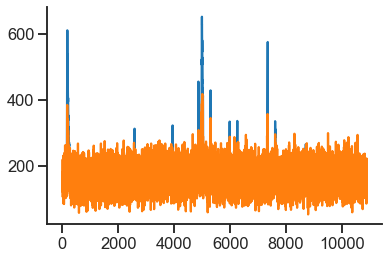

In [13]:
plt.plot(filteredDataArray_Fluo3[11].flatten())
plt.plot(filteredDataArray_Fluo_red3[11].flatten())
sns.despine()

In [10]:
DataArray_Fadj0 = DataArray_Fadj[0,:,:,:]
DataArray_Fadj0.shape

(8, 10, 136)

In [16]:
#np.range to check  

result_array_correlation1 = np.zeros((cellsToKeepTrue1,numOdors,numTrials))
for cell in range(cellsToKeepTrue1):
    for odor in range(numOdors):
        for trial in range(numTrials):
            result_array_correlation1[cell,odor,trial] = stats.pearsonr(filteredDataArray_Fluo1[cell,trial,odor,:],filteredDataArray_Fluo_red1[cell,trial,odor,:])[0] #0 = r, 1= p-value


result_array_correlation2 = np.zeros((cellsToKeepTrue2,numOdors,numTrials))
for cell in range(cellsToKeepTrue2):
    for odor in range(numOdors):
        for trial in range(numTrials):
            result_array_correlation2[cell,odor,trial] = stats.pearsonr(filteredDataArray_Fluo2[cell,trial,odor,:],filteredDataArray_Fluo_red2[cell,trial,odor,:])[0] #0 = r, 1= p-value


result_array_correlation3 = np.zeros((cellsToKeepTrue3,numOdors,numTrials))
for cell in range(cellsToKeepTrue3):
    for odor in range(numOdors):
        for trial in range(numTrials):
            result_array_correlation3[cell,odor,trial] = stats.pearsonr(filteredDataArray_Fluo3[cell,trial,odor,:],filteredDataArray_Fluo_red3[cell,trial,odor,:])[0] #0 = r, 1= p-value

In [20]:
result_array_correlation1 = result_array_correlation1.mean(2)
result_array_correlation1 = result_array_correlation1.mean(1)
result_array_correlation1.shape

result_array_correlation2 = result_array_correlation2.mean(2)
result_array_correlation2 = result_array_correlation2.mean(1)
result_array_correlation2.shape

result_array_correlation3 = result_array_correlation3.mean(2)
result_array_correlation3 = result_array_correlation3.mean(1)
result_array_correlation3.shape

(155,)

(array([[ 0.,  1.,  5.,  5., 13., 12.,  7., 10., 10., 13.,  6.,  7., 11.,
          5.,  3.,  5.,  5.,  4.,  1.,  0.,  2.,  1.,  0.,  2.,  1.,  1.,
          0.,  0.,  1.,  3.],
        [ 0.,  1.,  5.,  7.,  8.,  7., 15.,  9., 13.,  9., 16.,  8.,  3.,
          3.,  1.,  2.,  4.,  5.,  4.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  1.,  0.,  0.],
        [ 7., 10., 11., 19., 20., 20., 18.,  9., 13.,  5.,  6.,  7.,  1.,
          6.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.]]),
 array([0.01963878, 0.04229455, 0.06495032, 0.08760608, 0.11026185,
        0.13291762, 0.15557338, 0.17822915, 0.20088491, 0.22354068,
        0.24619645, 0.26885221, 0.29150798, 0.31416375, 0.33681951,
        0.35947528, 0.38213105, 0.40478681, 0.42744258, 0.45009835,
        0.47275411, 0.49540988, 0.51806565, 0.54072141, 0.56337718,
        0.58603295, 0.60868871, 0.63134448, 0.65400025, 0.67665601,
        0.69931178]),
 <a list of 3 Lists of Patches obj

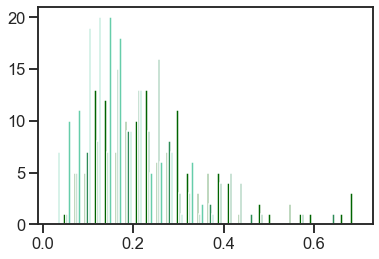

In [21]:
plt.hist([result_array_correlation1,result_array_correlation2,result_array_correlation3], bins=30, alpha = 1, rwidth=0.7, color = ["darkgreen", "seagreen", "mediumaquamarine"],label=['Plane 1', 'Plane 2', 'Plane 3'])

In [69]:
    FluoDistr1= filteredDataArray_Fluo1.mean(1)
    FluoDistr1= FluoDistr1[...,0:60]
    FluoDistr1= FluoDistr1.mean(2)
    FluoDistr1= FluoDistr1.mean(1)
    FluoDistr1.shape

    FluoDistr2= filteredDataArray_Fluo2.mean(1)
    FluoDistr2= FluoDistr2[...,0:60]
    FluoDistr2= FluoDistr2.mean(2)
    FluoDistr2= FluoDistr2.mean(1)
    FluoDistr2.shape

    FluoDistr3= filteredDataArray_Fluo3.mean(1)
    FluoDistr3= FluoDistr3[...,0:60]
    FluoDistr3= FluoDistr3.mean(2)
    FluoDistr3= FluoDistr3.mean(1)
    FluoDistr3.shape

(155,)

In [70]:
FluoDistrNorm1 = preprocessing.minmax_scale(FluoDistr1, feature_range=(0, 1),axis=0, copy=True)
FluoDistrNorm2 = preprocessing.minmax_scale(FluoDistr2, feature_range=(0, 1),axis=0, copy=True)
FluoDistrNorm3 = preprocessing.minmax_scale(FluoDistr3, feature_range=(0, 1),axis=0, copy=True)

In [46]:
saveDataFramePath1 = '/Users/sdaste/Desktop/DATA/OB_dataset_Analysis/Figures'

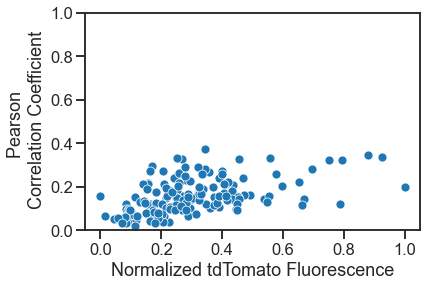

In [50]:
sns.scatterplot(x=FluoDistrNorm3, y=result_array_correlation3, palette=['green'])
plt.set_cmap('Accent')
plt.ylabel('Pearson \n Correlation Coefficient')
plt.xlabel('Normalized tdTomato Fluorescence')
plt.ylim(0,1)

path10 = os.path.join(saveDataFramePath1, "DistribuionFluo_Pearson_163_odorset2_Plane3.png")
plt.savefig(path10, transparent = True, dpi = 300, bbox_inches='tight')

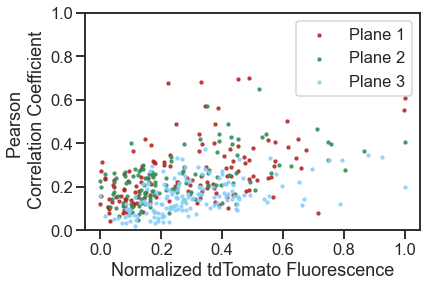

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=FluoDistrNorm1, y=result_array_correlation1, s=8, c='firebrick', label='Plane 1', alpha= 0.8)
ax1.scatter(x=FluoDistrNorm2, y=result_array_correlation2, s=8, c='seagreen', label='Plane 2', alpha= 0.8)
ax1.scatter(x=FluoDistrNorm3, y=result_array_correlation3, s=8, c='lightskyblue', label='Plane 3', alpha= 0.8)
plt.legend(loc='upper right');
plt.ylabel('Pearson \n Correlation Coefficient')
plt.xlabel('Normalized tdTomato Fluorescence')
plt.ylim(0,1)
plt.show()

# Calculate Fluorescence distribution of GCaMP and tdTomato - Non scaled arrays

In [11]:
saveDataFramePath = '/Volumes/Simone_2019/DATA/Simon/2P/Analysis_All_Mice/Plane_2'

In [52]:
def GetFluoMeanValueDistribution (array, lthresh, hthresh, Fluorophore):
    cellsmean= array.mean(1)
    cellsmean= cellsmean[...,lthresh:hthresh]
    cellsmean= cellsmean.mean(2)
    cellsmean= cellsmean.mean(1)
    return cellsmean

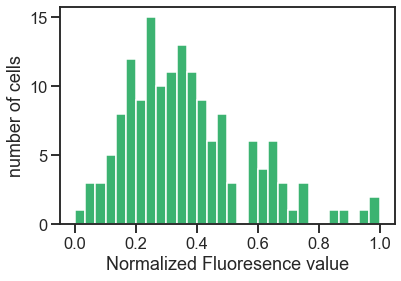

In [74]:
    Pm=plt.hist(FluoDistrNorm3, bins = 30, color = 'mediumseagreen')
    #plt.title(title)
    plt.xlabel('Normalized Fluoresence value')
    plt.ylabel('number of cells')
   # plt.axvline(0.75, color = 'r')
path10 = os.path.join(saveDataFramePath1, "Distribution_GCaMP_baseline_Plane3.png")
plt.savefig(path10, transparent = True, dpi = 300, bbox_inches='tight')

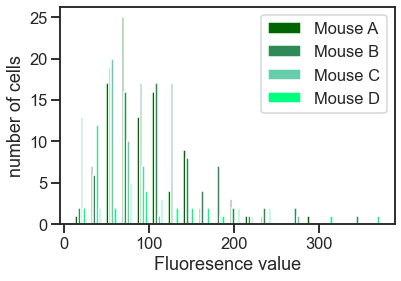

In [13]:
Baseline1 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo1,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
Baseline2 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo2,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
Baseline3 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo3,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
Baseline4 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo4,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
plt.hist([Baseline1,Baseline2,Baseline3,Baseline4], bins=20, alpha = 1, rwidth=0.7, color = ["darkgreen", "seagreen", "mediumaquamarine", "springgreen"],label=['Mouse A', 'Mouse B', 'Mouse C', 'Mouse D'])
plt.legend(loc='upper right')
plt.xlabel('Fluoresence value')
plt.ylabel('number of cells')

path10 = os.path.join(saveDataFramePath, "Distribution_GCaMP_baseline.png")
plt.savefig(path10, transparent = True, dpi = 300, bbox_inches='tight')

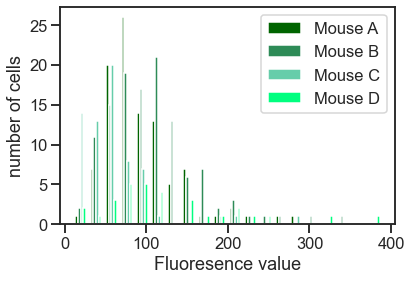

In [14]:
Baseline1 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo1,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
Baseline2 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo2,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
Baseline3 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo3,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
Baseline4 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo4,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
#plt.hist(Baseline1, bins = 20, alpha = 0.5)
#plt.hist(Baseline2, bins = 20, alpha = 0.5)
#plt.hist(Baseline3, bins = 20, alpha = 0.5)
#plt.hist(Baseline4, bins = 20, alpha = 0.5)
plt.hist([Baseline1,Baseline2,Baseline3,Baseline4], bins=20, alpha = 1, rwidth=0.7, color = ["darkgreen", "seagreen", "mediumaquamarine", "springgreen"], label=['Mouse A', 'Mouse B', 'Mouse C', 'Mouse D'])
plt.legend(loc='upper right')
plt.xlabel('Fluoresence value')
plt.ylabel('number of cells')

path11 = os.path.join(saveDataFramePath, "Distribution_GCaMP_onset.png")
plt.savefig(path11, transparent = True, dpi = 300, bbox_inches='tight')

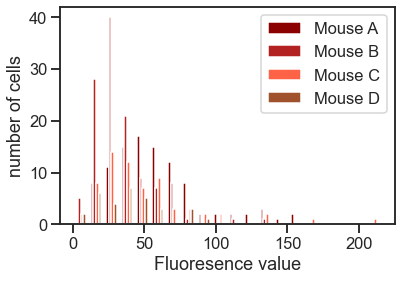

In [15]:
Baselinered1 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red1,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
Baselinered2 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red2,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
Baselinered3 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red3,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
Baselinered4 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red4,lthresh=0, hthresh=45, Fluorophore="mediumseagreen")
plt.hist([Baselinered1,Baselinered2,Baselinered3,Baselinered4], bins=20, alpha = 1, rwidth=0.7, color = ["darkred", "firebrick", "tomato", "sienna"], label=['Mouse A', 'Mouse B', 'Mouse C', 'Mouse D'])
plt.legend(loc='upper right')
plt.xlabel('Fluoresence value')
plt.ylabel('number of cells')
path12 = os.path.join(saveDataFramePath, "Distribution_tdTomato_baseline.png")
plt.savefig(path12, transparent = True, dpi = 300, bbox_inches='tight')

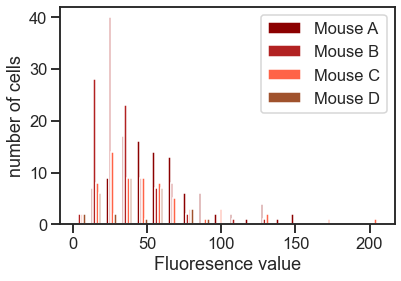

In [16]:
Baselinered1 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red1,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
Baselinered2 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red2,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
Baselinered3 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red3,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
Baselinered4 = GetFluoMeanValueDistribution(array=filteredDataArray_Fluo_red4,lthresh=46, hthresh=60, Fluorophore="mediumseagreen")
plt.hist([Baselinered1,Baselinered2,Baselinered3,Baselinered4], bins=20, alpha = 1, rwidth=0.7, color = ["darkred", "firebrick", "tomato", "sienna"], label=['Mouse A', 'Mouse B', 'Mouse C', 'Mouse D'])
plt.legend(loc='upper right')
plt.xlabel('Fluoresence value')
plt.ylabel('number of cells')
path13 = os.path.join(saveDataFramePath, "Distribution_tdTomato_onset.png")
plt.savefig(path13, transparent = True, dpi = 300, bbox_inches='tight')

# Get tdTomato positive cells list!

In [29]:
# Necessary to do it on all cells (aka with false positives)
Redcellsmean= DataArray_Fadj_Fluo_red.mean(1)
Redcellsmean= Redcellsmean[...,0:45]
Redcellsmean= Redcellsmean.mean(2)
Redcellsmean= Redcellsmean.mean(1)

In [30]:
RedCellId = []
RedCellProb = []
for cell in range (numCells):
    RedCellId1= DF.loc [DF.cellID==cell, 'cellID'].values
    RedCellProb1= DF.loc [DF.cellID==cell, 'cellProbBinary'].values
    RedCellId.append(RedCellId1.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
    RedCellProb.append(RedCellProb1.reshape(numTrials,numOdors,numFramesOdorTrial)[None])

RedCellId = np.concatenate(RedCellId,0)
RedCellProb = np.concatenate(RedCellProb,0)

RedCellId = RedCellId[:,0,0,0]
RedCellProb = RedCellProb[:,0,0,0]

print(f'4D matrices are the same size: {RedCellId.shape==Redcellsmean.shape}')

4D matrices are the same size: True


In [31]:
RedCellList = pd.DataFrame(np.vstack((RedCellId[:], RedCellProb[:], Redcellsmean[:]))).T

In [32]:
# Put Fluorescence intensity threshold to select true positive tdTomato cells
RedThrslhd = 70

RedCellListFinal = RedCellList[RedCellList[1] == 1.0]
RedCellListFinal = RedCellListFinal[RedCellListFinal[2] >= RedThrslhd]
RedCellListFinal = RedCellListFinal.rename({0: 'cellID', 1: 'GreencellProb', 2: 'RedcellMeanFluo'}, axis=1)
RedCellListFinal

cellID  GreencellProb  RedcellMeanFluo
0      0.0            1.0       109.555014
2      2.0            1.0        76.088415
14    14.0            1.0        73.936412
21    21.0            1.0       134.220999
30    30.0            1.0        72.760077

In [33]:
RedCellListSave = RedCellListFinal["cellID"]

# Create 4D numpy array with only tdTomato cells

In [34]:
# Create list of Redcells to keep from above
RedcellsToKeep = RedCellListFinal['cellID']
RedcellsToKeep = RedcellsToKeep.to_numpy()
RedcellsToKeep = RedcellsToKeep.astype(int)

In [35]:
DataArray_Red = DataArray_Fadj[RedcellsToKeep,:,:,:]
DataArray_Red.shape

(5, 8, 10, 136)

# Drop Red cells to get Green only

In [36]:
GreenCellListFinal = RedCellList[RedCellList[1] == 1.0]
GreenCellListFinal = GreenCellListFinal[GreenCellListFinal[2] < RedThrslhd]
GreenCellListFinal = GreenCellListFinal.rename({0: 'cellID', 1: 'GreencellProb', 2: 'RedcellMeanFluo'}, axis=1)

In [37]:
GreencellsToKeep = GreenCellListFinal['cellID']
GreencellsToKeep = GreencellsToKeep.to_numpy()
GreencellsToKeep = GreencellsToKeep.astype(int)

In [38]:
DataArray_Green = DataArray_Fadj[GreencellsToKeep,:,:,:]
DataArray_Green.shape

(116, 8, 10, 136)

# Final matrices to work with - cells x trials x stimuli x time

In [39]:
filteredDataArraypath = os.path.join(saveDataFramePath, "filteredDataArray.npy")
DataArray_Redpath = os.path.join(saveDataFramePath, "DataArray_Red.npy")
DataArray_Greenpath = os.path.join(saveDataFramePath, "DataArray_Green.npy")
RedCellListSavepath = os.path.join(saveDataFramePath, "RedCellList.npy")

In [40]:
#All Cells 
                            #filteredDataArray
save(file = filteredDataArraypath, arr= filteredDataArray)

#Only Red cells
                            #DataArray_Red
save(file = DataArray_Redpath, arr= DataArray_Red)

#Only Green non-Red cells
                            #DataArray_Green
save(file = DataArray_Greenpath, arr= DataArray_Green)

#List of tdTomato cells
                            #RedCellList
save(file = RedCellListSavepath, arr= RedCellListSave)